# Telecom Churn Analysis

Telecom Company Service Performance Analysis

Dataset available at:
https://www.kaggle.com/datasets/datazng/telecom-company-churn-rate-call-center-data/data


With this dataset the study will try to answer the following questions:
- What is the current Churn Rate?
- What new clients are more probable to Churn?
- What is the period in months estimated for that new Churn?

## Importing Libraries

In [17]:
# linear algebra / data processing
import numpy as np  
import pandas as pd 

# Data visualization 
import seaborn as sns
import matplotlib.pyplot as plt

#Machine learning
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import sklearn.metrics as metrics

## Importing Data

In [18]:
df=pd.read_excel('C:/Users/lvbru/OneDrive/Documentos/Bruno/Ciencia_de_Dados/Portifolio_Pessoal/Portifolio/Telecom_Churn_Rate/Telecom Churn Rate Dataset.xlsx')

Looking at the available data

In [19]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,0,0,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,0,0,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0,5,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,0,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,0,0,Yes


In [20]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'numAdminTickets',
       'numTechTickets', 'Churn'],
      dtype='object')

## Features Description

- customerID: Customer ID
- genderCustomer: gender (female, male)
- SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
- PartnerWhether: the customer has a partner or not (Yes, No)
- Dependents: Whether the customer has dependents or not (Yes, No)
- tenure: Number of months the customer has stayed with the company
- PhoneService: Whether the customer has a phone service or not (Yes, No)
- MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract: The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges: The amount charged to the customer monthly
- TotalCharges: The total amount charged to the customer
- numAdminTickets: The number of Admin Ticket
- numTechTickets: The number of Tech Ticket
- Churn: Whether the customer churned or not (Yes or No)

## Data Cleaning

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- For some reason the 'TotalCharges' column is type object, so it is being observed as a string.

cheking for null or NaN vallues

In [22]:
print(df.isnull().values.any())
print(df.isna().values.any())

False
False


In [23]:
df['TotalCharges'].describe()

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

- Looking at the result above it is possible to conclude that there is 11 lines with an empty value.

- It is importante to observate that the empty value is diferent from NaN or from 0. 

- meanning this is probably a ' ' (space).

In [24]:
df[df['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,0,0,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,20.25,,5,0,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,Yes,Two year,No,Mailed check,80.85,,0,0,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,25.75,,1,0,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,No,Two year,No,Credit card (automatic),56.05,,0,0,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,19.85,,0,0,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,25.35,,0,0,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,20.00,,5,0,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,One year,Yes,Mailed check,19.70,,0,0,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,No,Two year,No,Mailed check,73.35,,0,0,No


- Since there is no way to know or calculate the TotalCharges for this 11 lines and also considering that they represent 0,156% of the total costumers:

        - The 11 lines will be deleated;
        
        - The column type will be transformed to float64.

In [25]:
df.drop(df[df['TotalCharges'] == ' '].index, axis=0, inplace=True)

In [26]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [28]:
df['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

## Analysis

Making a copy of the DataFrame to avoid e new data loading, if needed.

In [29]:
df1 = df.copy() 
df1.drop('customerID', axis=1, inplace = True)

In [30]:
df1['Churn'].describe()

count     7032
unique       2
top         No
freq      5163
Name: Churn, dtype: object

Finding out what is the current Churn Rate

In [31]:
churn_prop = round((1- df1['Churn'].describe()[3]/df1['Churn'].describe()[0])*100,2)
print(f'The current churn rate is {churn_prop}%')

The current churn rate is 26.58%


Looking at the segment of variables and their relations with Churn

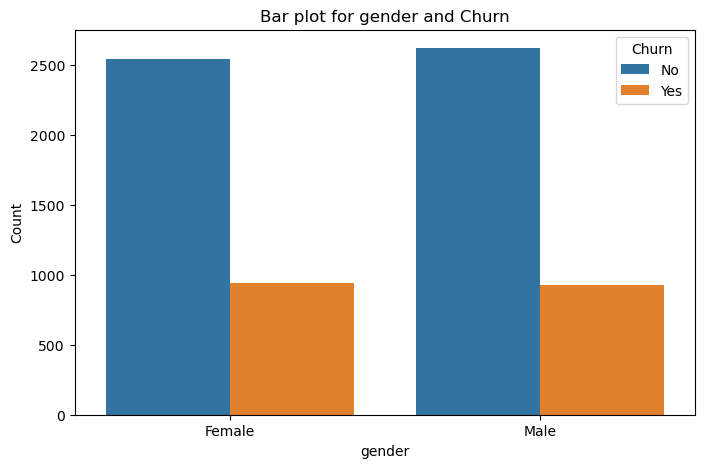

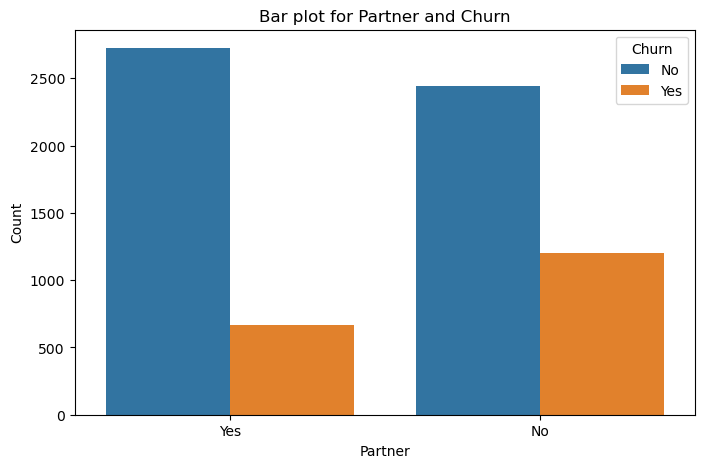

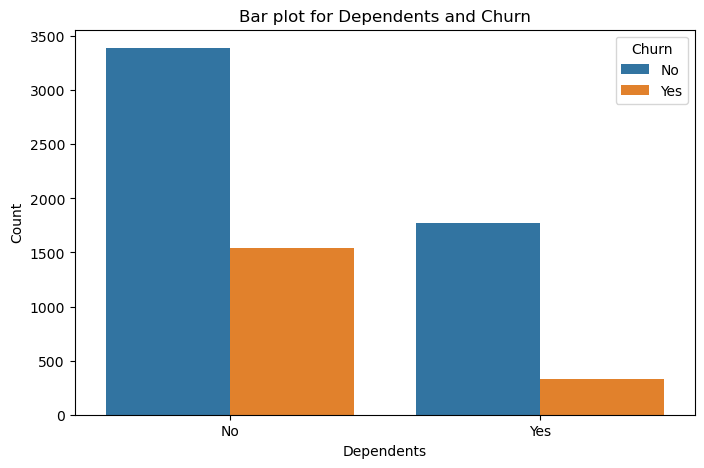

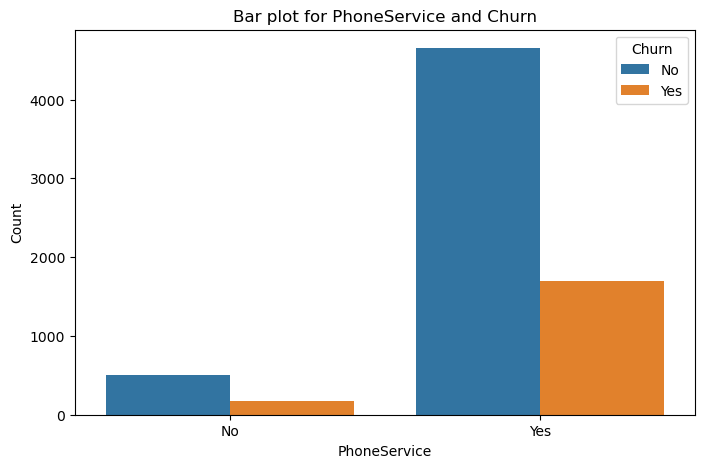

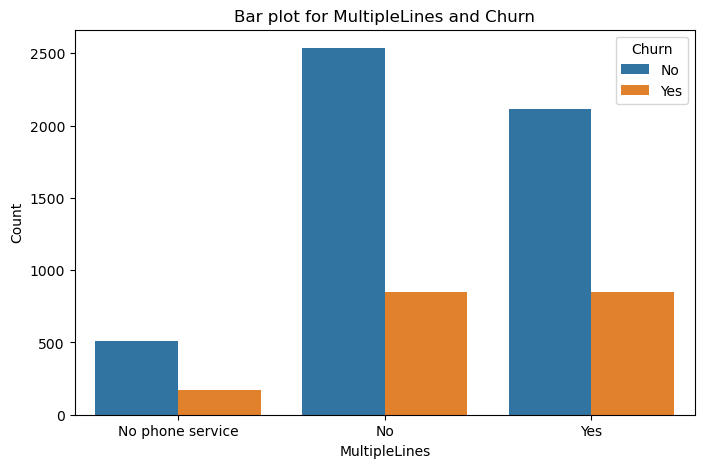

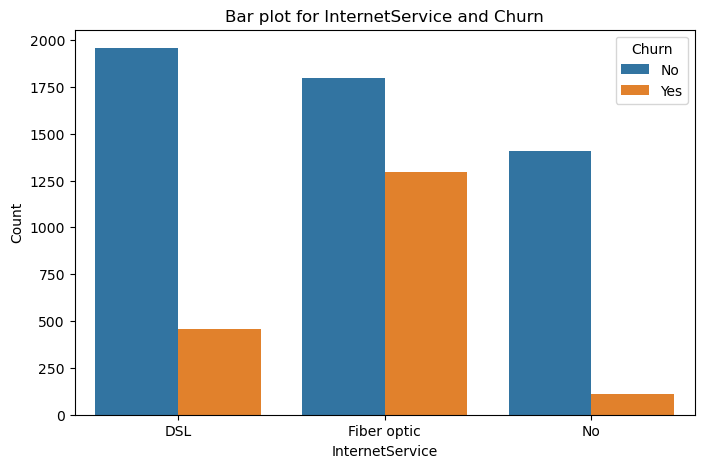

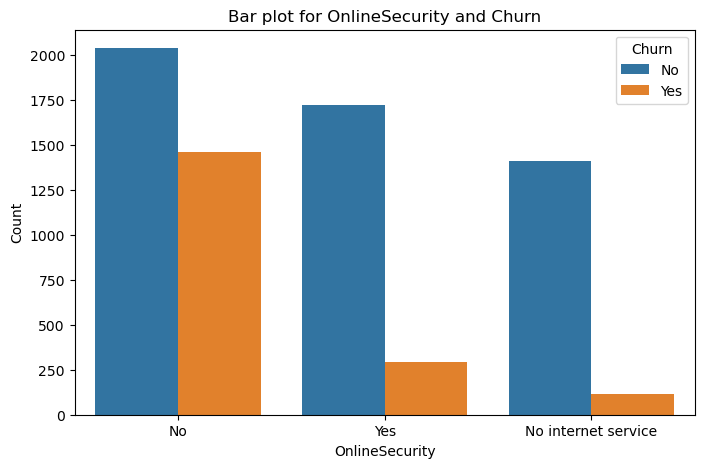

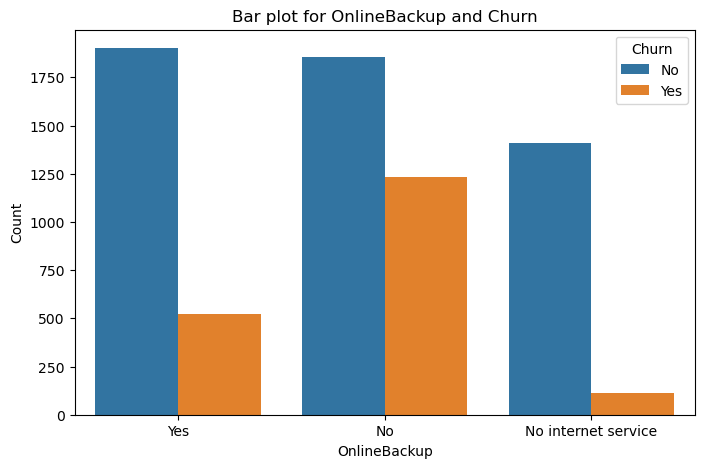

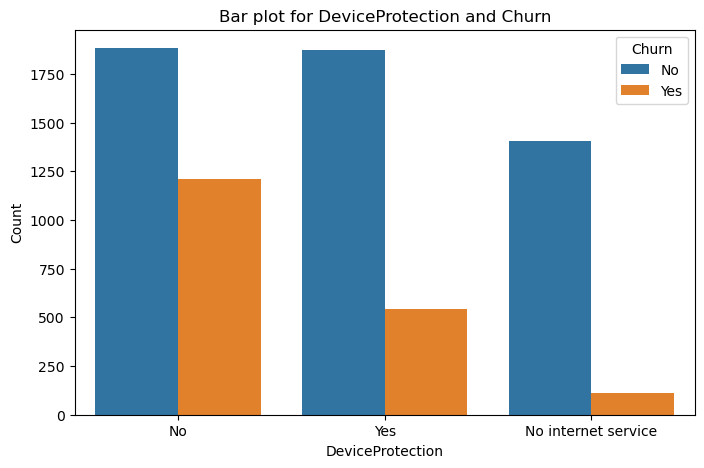

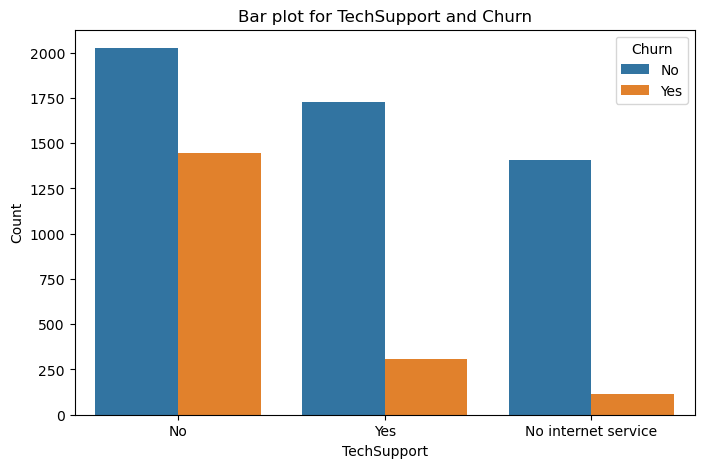

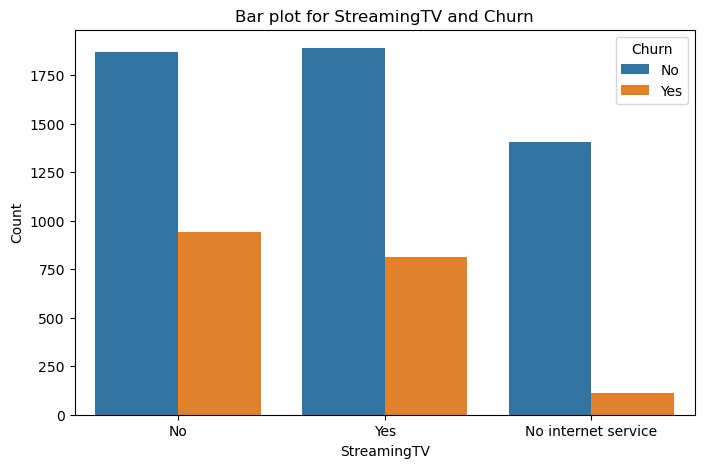

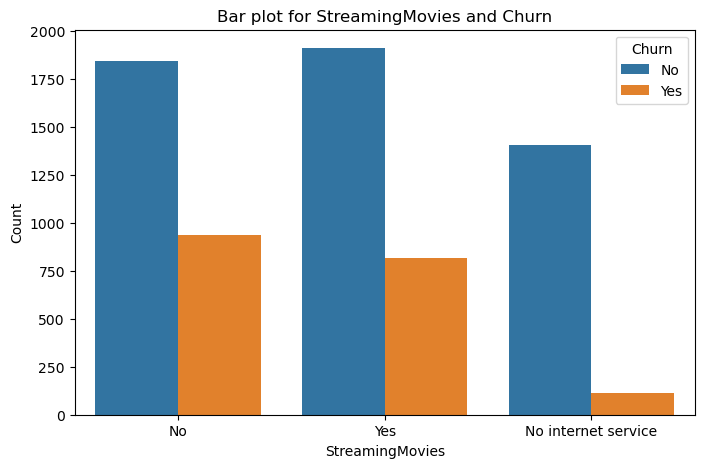

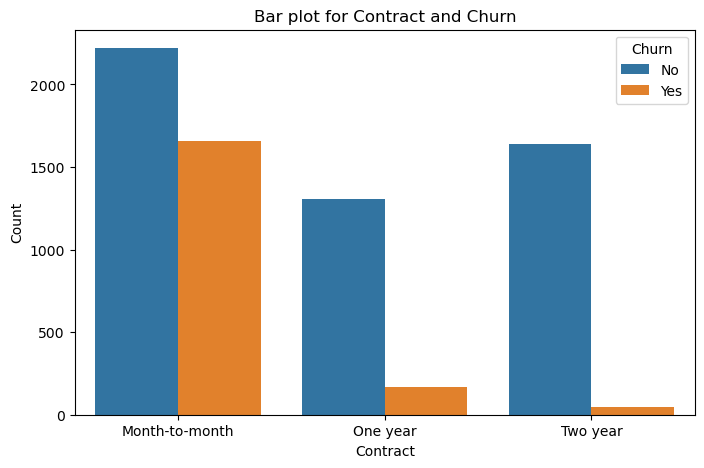

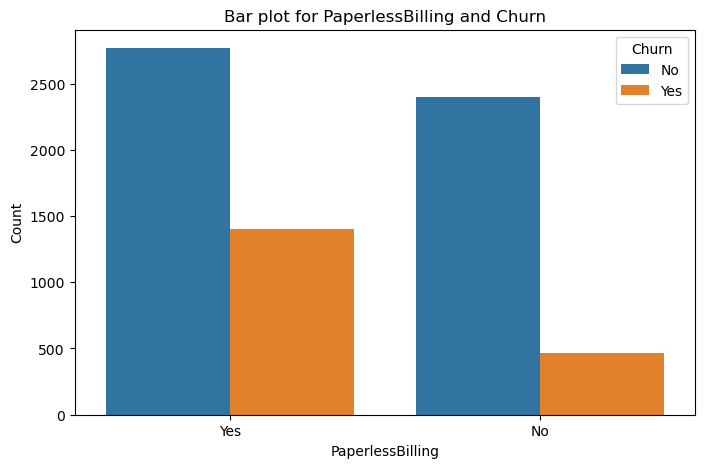

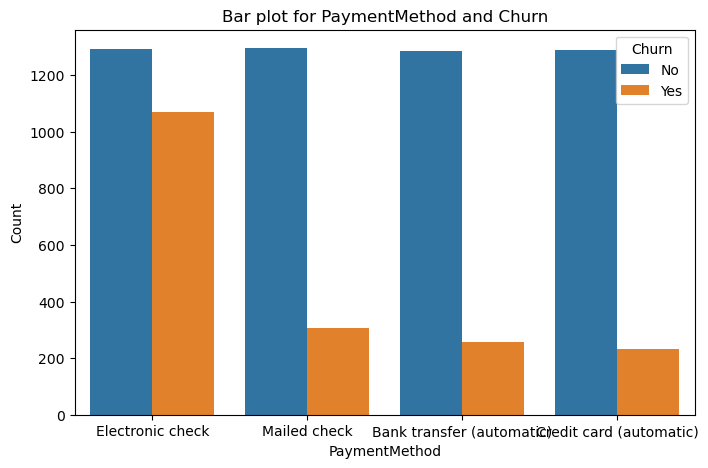

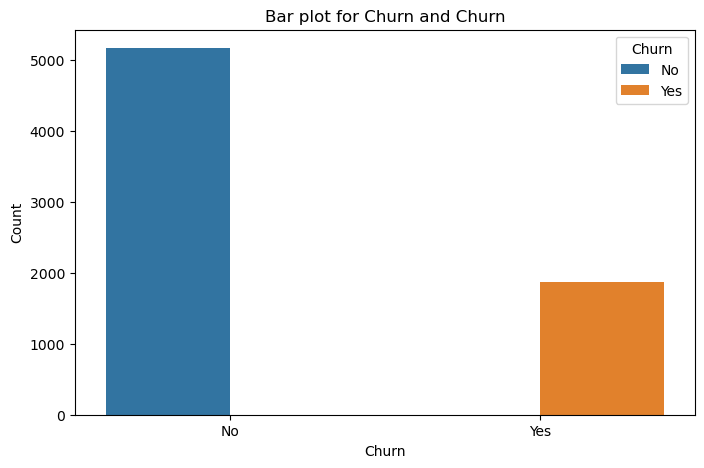

In [32]:
df1_no_id = df1.drop('customerID', axis=1, errors='ignore')


churn = df1_no_id['Churn']
categorical_vars = df1_no_id.select_dtypes(include='object')


for column in categorical_vars.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=column, hue='Churn', data=df1_no_id)
    plt.title(f'Bar plot for {column} and Churn')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()



c:\Users\lvbru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\lvbru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\lvbru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\lvbru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

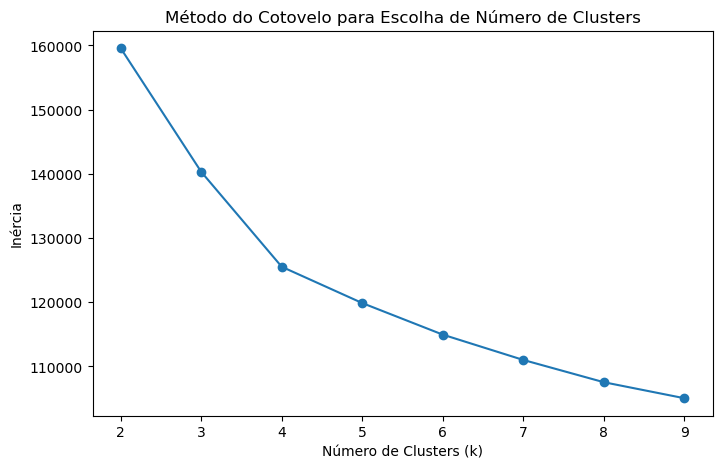

In [33]:
df1_no_id_churn = df1.drop(['customerID', 'Churn'], axis=1, errors='ignore')

# Converta variáveis categóricas em variáveis dummy
df1_dummies = pd.get_dummies(df1_no_id_churn, drop_first=True)

# Padronize os dados
scaler = StandardScaler()
df1_scaled = scaler.fit_transform(df1_dummies)

# Aplique o algoritmo K-means para diferentes valores de k
inertia = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df1_scaled)
    inertia.append(kmeans.inertia_)

# Visualize a curva de cotovelo
plt.figure(figsize=(8, 5))
plt.plot(range(2, 10), inertia, marker='o')
plt.title('Método do Cotovelo para Escolha de Número de Clusters')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.show()


c:\Users\lvbru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


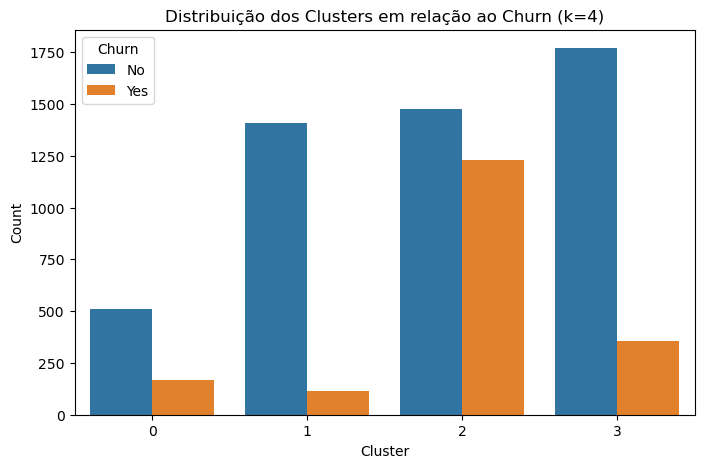

The current churn rate is :
---------------------------
 - Cluster 0: 25.00% out of 680 clients

 - Cluster 1: 7.43% out of 1520 clients

 - Cluster 2: 45.43% out of 2705 clients

 - Cluster 3: 16.78% out of 2127 clients


In [34]:
# Escolha do número de clusters com base no método do cotovelo
chosen_k = 4  # substitua pelo valor escolhido

# Aplique o algoritmo K-means com o número escolhido de clusters
kmeans = KMeans(n_clusters=chosen_k, random_state=42)
df1['Cluster'] = kmeans.fit_predict(df1_scaled)

# Visualize a distribuição dos clusters
plt.figure(figsize=(8, 5))
sns.countplot(x='Cluster', hue='Churn', data=df1)
plt.title(f'Distribuição dos Clusters em relação ao Churn (k={chosen_k})')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

cluster_0_churn_counts = df1.loc[df1['Cluster'] == 0, 'Churn'].value_counts()
prop_no = cluster_0_churn_counts['Yes'] / cluster_0_churn_counts.sum()

cluster_1_churn_counts = df1.loc[df1['Cluster'] == 1, 'Churn'].value_counts()
prop_no1 = cluster_1_churn_counts['Yes'] / cluster_1_churn_counts.sum()

cluster_2_churn_counts = df1.loc[df1['Cluster'] == 2, 'Churn'].value_counts()
prop_no2 = cluster_2_churn_counts['Yes'] / cluster_2_churn_counts.sum()

cluster_3_churn_counts = df1.loc[df1['Cluster'] == 3, 'Churn'].value_counts()
prop_no3 = cluster_3_churn_counts['Yes'] / cluster_3_churn_counts.sum()

print(f'The current churn rate is :')
print('---------------------------')
print(f' - Cluster 0: {prop_no:.2%} out of {cluster_0_churn_counts.sum()} clients')
print()
print(f' - Cluster 1: {prop_no1:.2%} out of {cluster_1_churn_counts.sum()} clients')
print()
print(f' - Cluster 2: {prop_no2:.2%} out of {cluster_2_churn_counts.sum()} clients')
print()
print(f' - Cluster 3: {prop_no3:.2%} out of {cluster_3_churn_counts.sum()} clients')

In [35]:
cluster_data = df1[df1['Cluster'] == 2]

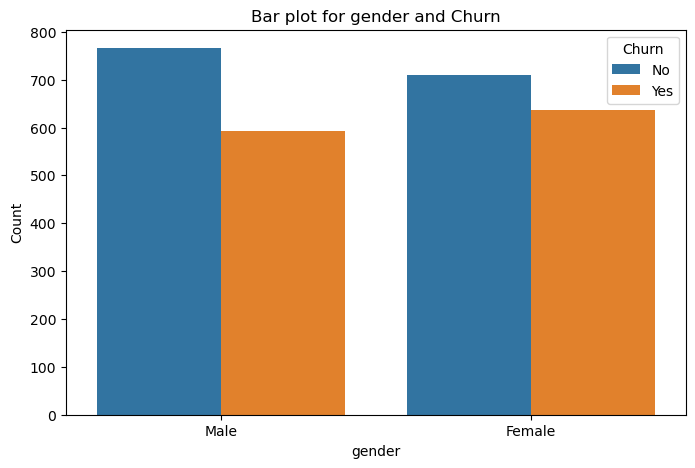

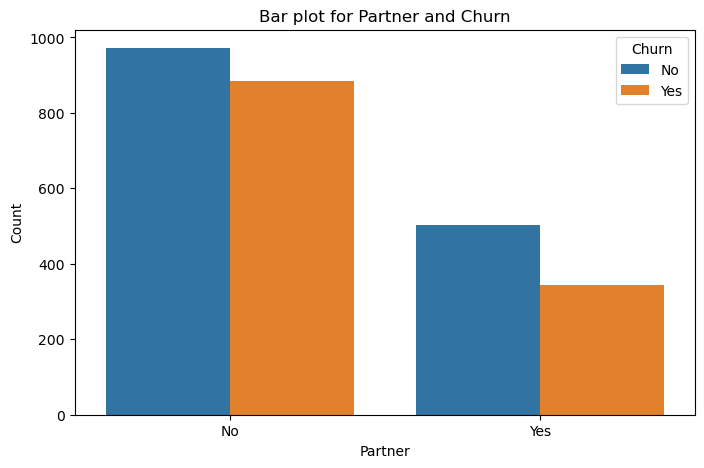

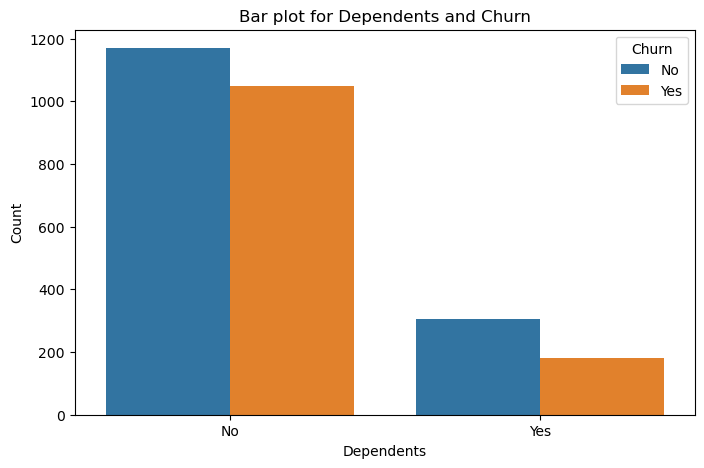

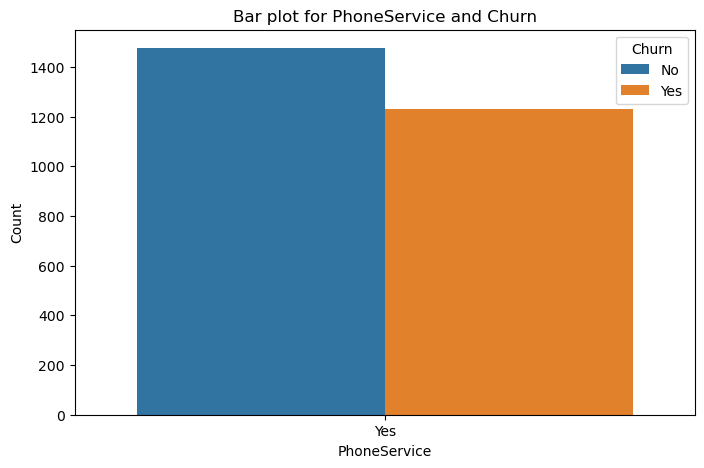

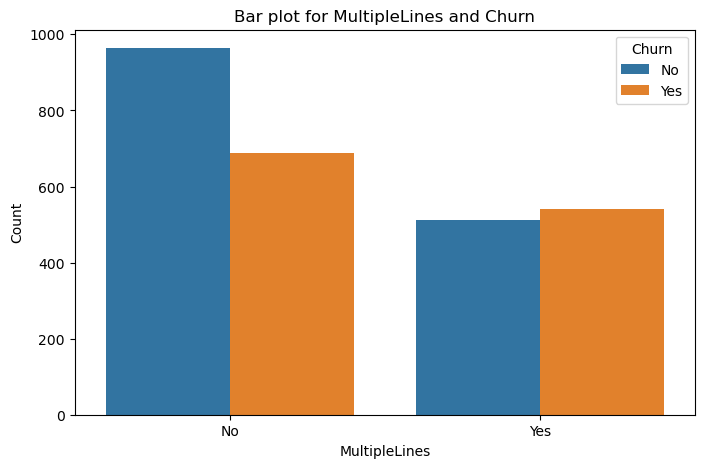

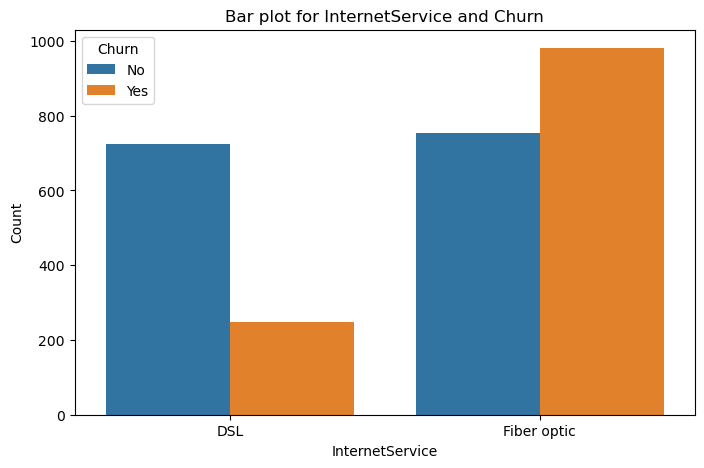

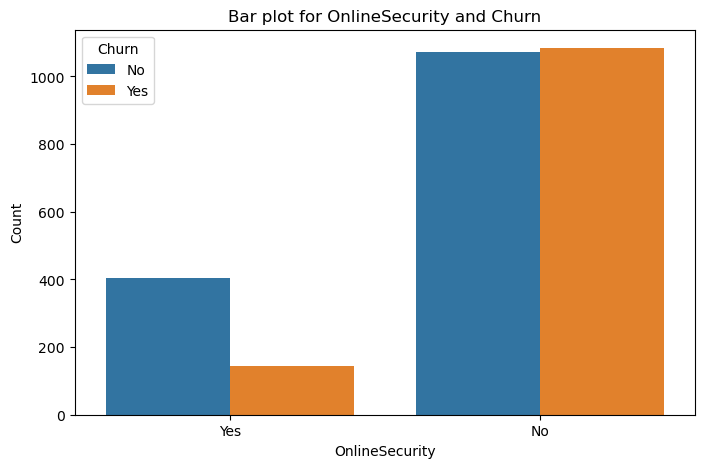

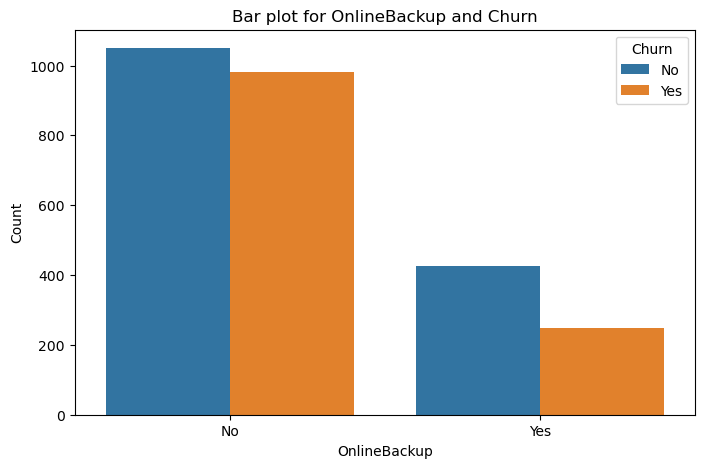

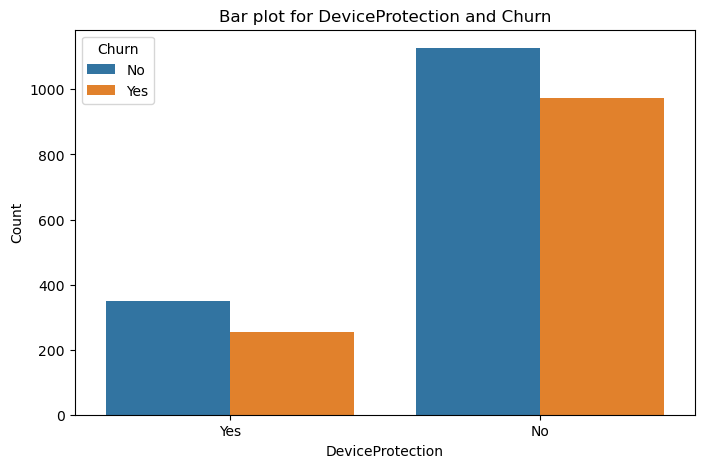

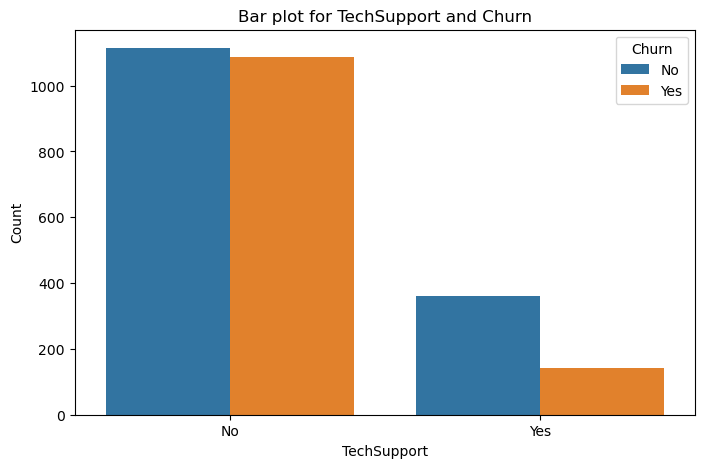

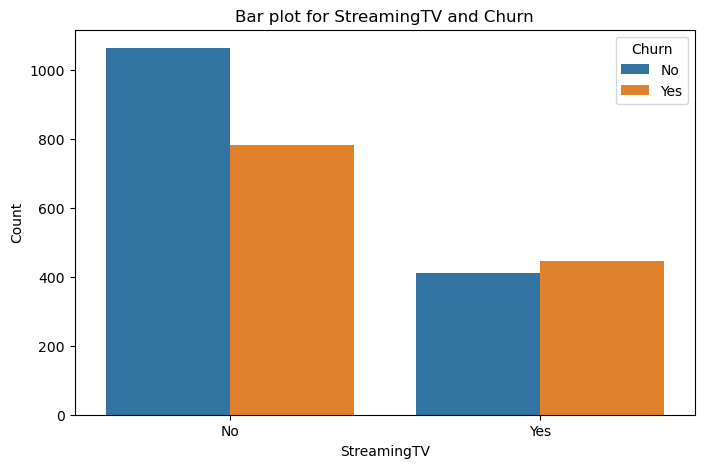

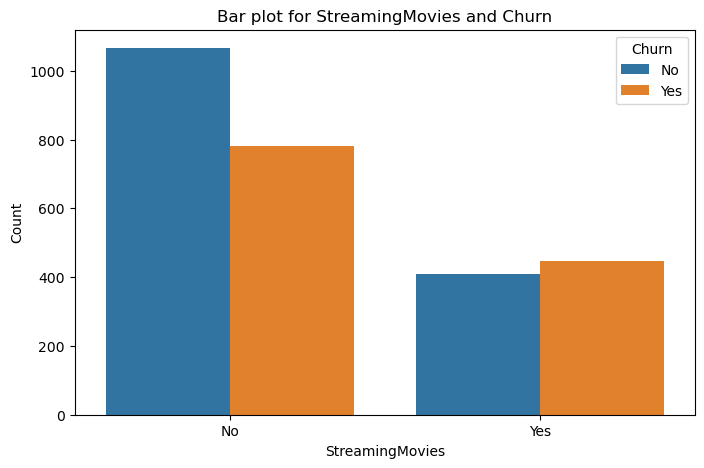

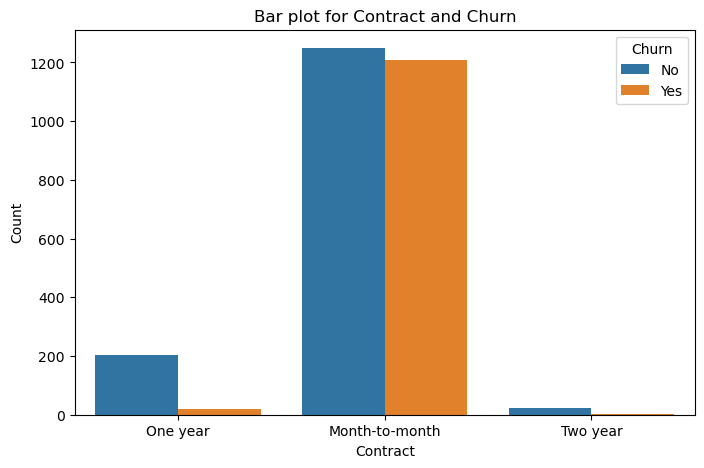

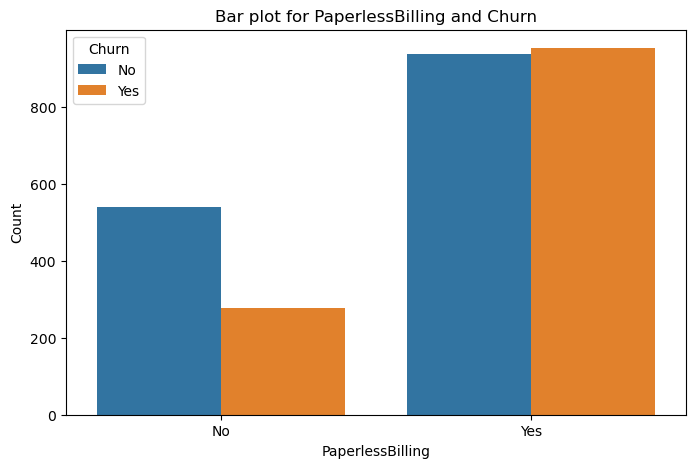

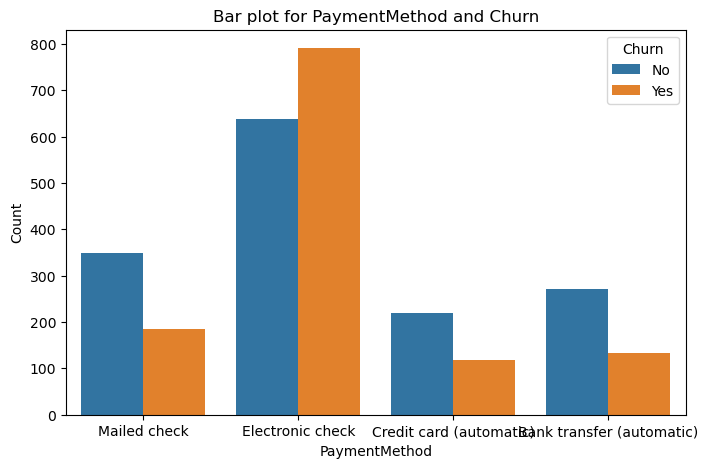

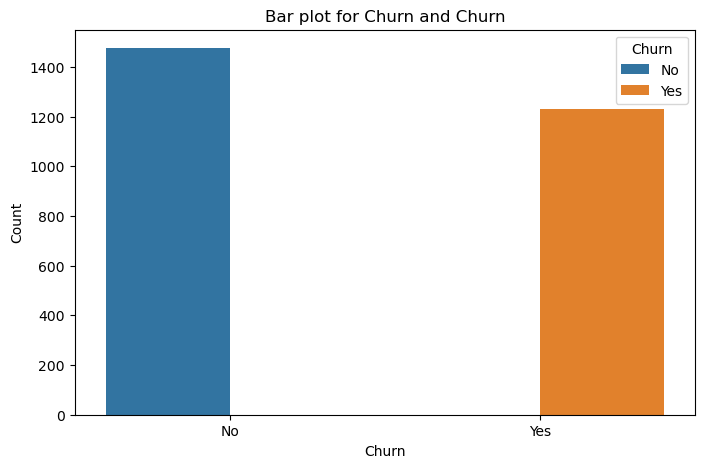

In [36]:
cluster_data_no_id = cluster_data.drop('customerID', axis=1, errors='ignore')

churn = cluster_data_no_id['Churn']
categorical_vars = cluster_data_no_id.select_dtypes(include='object')

# Loop através de cada variável categórica e plotar um gráfico de barras
for column in categorical_vars.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=column, hue='Churn', data=cluster_data_no_id)
    plt.title(f'Bar plot for {column} and Churn')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

Verifying the influence and direction of the independent variables at the selected cluster

In [37]:
centroids = kmeans.cluster_centers_

centroids_df = pd.DataFrame(centroids, columns=df1_dummies.columns)

# Exibir os centróides para o Cluster N
cluster_centroid = centroids_df.iloc[2]  
print(cluster_centroid)


SeniorCitizen                            0.131805
tenure                                  -0.694188
MonthlyCharges                           0.292886
TotalCharges                            -0.501155
numAdminTickets                         -0.018394
numTechTickets                          -0.175224
gender_Male                             -0.004212
Partner_Yes                             -0.337729
Dependents_Yes                          -0.259010
PhoneService_Yes                         0.327189
MultipleLines_No phone service          -0.327189
MultipleLines_Yes                       -0.066401
InternetService_Fiber optic              0.404687
InternetService_No                      -0.525130
OnlineSecurity_No internet service      -0.525130
OnlineSecurity_Yes                      -0.185038
OnlineBackup_No internet service        -0.525130
OnlineBackup_Yes                        -0.200720
DeviceProtection_No internet service    -0.525130
DeviceProtection_Yes                    -0.254779


selecting only the variables with a major importance in the cluster 2

In [38]:
percentage_to_select = 0.8

# Calculate the absolute values of the cluster centroid coefficients
abs_cluster_centroid = abs(cluster_centroid)

# Sort the coefficients based on their absolute values in descending order
sorted_coefs = abs_cluster_centroid.sort_values(ascending=False)

# Determine the cutoff index to select the top 80%
cutoff_index = int(len(sorted_coefs) * percentage_to_select)

# Select the top 80% coefficients
selected_coefs = cluster_centroid[sorted_coefs.index[:cutoff_index]]

print(selected_coefs)


tenure                                  -0.694188
Contract_Two year                       -0.539720
OnlineBackup_No internet service        -0.525130
StreamingMovies_No internet service     -0.525130
StreamingTV_No internet service         -0.525130
TechSupport_No internet service         -0.525130
DeviceProtection_No internet service    -0.525130
OnlineSecurity_No internet service      -0.525130
InternetService_No                      -0.525130
TotalCharges                            -0.501155
PaymentMethod_Electronic check           0.405897
InternetService_Fiber optic              0.404687
Partner_Yes                             -0.337729
PhoneService_Yes                         0.327189
MultipleLines_No phone service          -0.327189
Contract_One year                       -0.311063
MonthlyCharges                           0.292886
Dependents_Yes                          -0.259010
DeviceProtection_Yes                    -0.254779
TechSupport_Yes                         -0.227211


selecting the name of each variable at df1 that is referenciate at the list above

In [39]:
selected_features = selected_coefs.index.tolist()
selected_features

important_features = [coluna for coluna in df1.columns if any(coluna.startswith(feature[:6]) for feature in selected_features)]
important_features

['Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'numTechTickets']

Crating numerical labels to process the object type columns with the machine learning algoritms

In [40]:
df2 = df1.copy()

In [41]:
# Criar uma instância do LabelEncoder
encoder = LabelEncoder()

# Dicionário para armazenar as legendas de conversão
legendas_conversao = {}

# Percorrer e transformar toda a base de dados
for variavel in df1.columns:
    if df1[variavel].dtype == 'object':
        # Aplicar o LabelEncoder e armazenar as legendas
        df1[variavel] = encoder.fit_transform(df1[variavel])
        legendas_conversao[variavel] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

# Imprimir as legendas de conversão
for variavel, legenda in legendas_conversao.items():
    print(f"Legenda para {variavel}: {legenda}")


Legenda para gender: {'Female': 0, 'Male': 1}
Legenda para Partner: {'No': 0, 'Yes': 1}
Legenda para Dependents: {'No': 0, 'Yes': 1}
Legenda para PhoneService: {'No': 0, 'Yes': 1}
Legenda para MultipleLines: {'No': 0, 'No phone service': 1, 'Yes': 2}
Legenda para InternetService: {'DSL': 0, 'Fiber optic': 1, 'No': 2}
Legenda para OnlineSecurity: {'No': 0, 'No internet service': 1, 'Yes': 2}
Legenda para OnlineBackup: {'No': 0, 'No internet service': 1, 'Yes': 2}
Legenda para DeviceProtection: {'No': 0, 'No internet service': 1, 'Yes': 2}
Legenda para TechSupport: {'No': 0, 'No internet service': 1, 'Yes': 2}
Legenda para StreamingTV: {'No': 0, 'No internet service': 1, 'Yes': 2}
Legenda para StreamingMovies: {'No': 0, 'No internet service': 1, 'Yes': 2}
Legenda para Contract: {'Month-to-month': 0, 'One year': 1, 'Two year': 2}
Legenda para PaperlessBilling: {'No': 0, 'Yes': 1}
Legenda para PaymentMethod: {'Bank transfer (automatic)': 0, 'Credit card (automatic)': 1, 'Electronic check':

In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int32  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int32  
 3   Dependents        7032 non-null   int32  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int32  
 6   MultipleLines     7032 non-null   int32  
 7   InternetService   7032 non-null   int32  
 8   OnlineSecurity    7032 non-null   int32  
 9   OnlineBackup      7032 non-null   int32  
 10  DeviceProtection  7032 non-null   int32  
 11  TechSupport       7032 non-null   int32  
 12  StreamingTV       7032 non-null   int32  
 13  StreamingMovies   7032 non-null   int32  
 14  Contract          7032 non-null   int32  
 15  PaperlessBilling  7032 non-null   int32  
 16  PaymentMethod     7032 non-null   int32  


In [43]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn,Cluster
0,0,0,1,0,1,0,1,0,0,2,...,0,0,1,2,29.85,29.85,0,0,0,0
1,1,0,0,0,34,1,0,0,2,0,...,0,1,0,3,56.95,1889.50,0,0,0,2
2,1,0,0,0,2,1,0,0,2,2,...,0,0,1,3,53.85,108.15,0,0,1,2
3,1,0,0,0,45,0,1,0,2,0,...,0,1,0,0,42.30,1840.75,0,3,0,0
4,0,0,0,0,2,1,0,1,0,0,...,0,0,1,2,70.70,151.65,0,0,1,2


Observe each variable distribuition

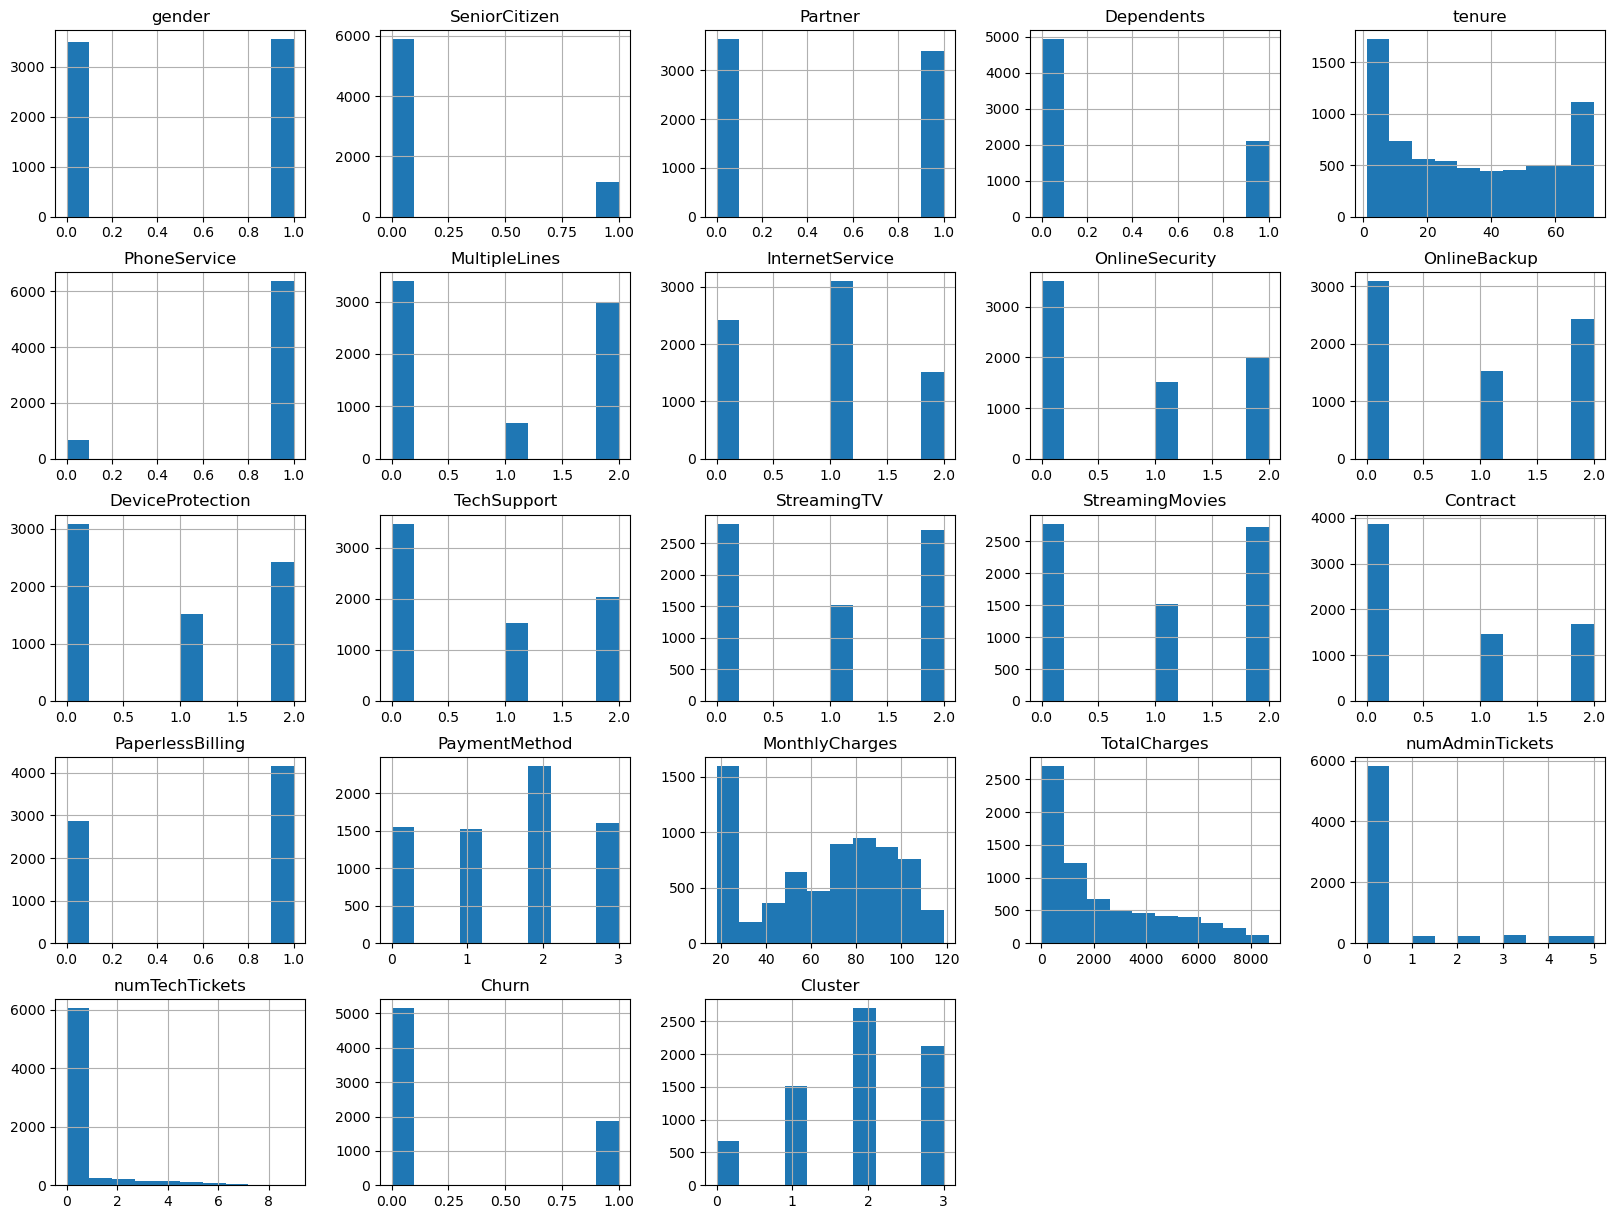

In [44]:
df1.hist()
plt.gcf().set_size_inches(20, 15)

It is noticeable that the columns 'MonthlyCharges', 'tenure', and 'TotalCharges' present a different behavior, resembling a continuous variable rather than a discrete one.

Since this behavior is not linear, it can cause problems for the Machine Learning algorithms.

Therefore, we'll separate them into groups to maintain variables with a categorical behavior.

In [45]:
# Making a copy of the data frame for further identification of the intervals created.
df_cut = df1.copy()

In [46]:
ncut = 10

df1['tenure'] = pd.qcut(df1['tenure'], ncut, labels = False)
df1['MonthlyCharges'] = pd.qcut(df1['MonthlyCharges'], ncut, labels = False)
df1['TotalCharges'] = pd.qcut(df1['TotalCharges'], ncut, labels = False)

In [47]:
print('Amount of intervals:')
print('--------------------')
print('tenure:')
print(pd.qcut(df_cut['tenure'], ncut, labels = False).unique())
print()
print('MonthlyCharges:')
print(pd.qcut(df_cut['MonthlyCharges'], ncut, labels = False).unique())
print()
print('TotalCharges:')
print(pd.qcut(df_cut['TotalCharges'], ncut, labels = False).unique())

Amount of intervals:
--------------------
tenure:
[0 5 6 2 4 8 3 7 9 1]

MonthlyCharges:
[2 3 5 8 7 9 0 1 4 6]

TotalCharges:
[0 5 1 3 2 6 7 8 9 4]


In [48]:
print('Intervals values:')
print('-----------------')
print('tenure:')
print(pd.qcut(df_cut['tenure'], ncut, labels = None).unique())
print()
print('MonthlyCharges:')
print(pd.qcut(df_cut['MonthlyCharges'], ncut, labels = None).unique())
print()
print('TotalCharges:')
print(pd.qcut(df_cut['TotalCharges'], ncut, labels = None).unique())

Intervals values:
-----------------
tenure:
[(0.999, 2.0], (29.0, 40.0], (40.0, 50.0], (6.0, 12.0], (20.0, 29.0], (60.8, 69.0], (12.0, 20.0], (50.0, 60.8], (69.0, 72.0], (2.0, 6.0]]
Categories (10, interval[float64, right]): [(0.999, 2.0] < (2.0, 6.0] < (6.0, 12.0] < (12.0, 20.0] ... (40.0, 50.0] < (50.0, 60.8] < (60.8, 69.0] < (69.0, 72.0]]

MonthlyCharges:
[(25.05, 45.9], (45.9, 58.92], (70.35, 79.15], (94.3, 102.645], (85.535, 94.3], (102.645, 118.75], (18.249, 20.05], (20.05, 25.05], (58.92, 70.35], (79.15, 85.535]]
Categories (10, interval[float64, right]): [(18.249, 20.05] < (20.05, 25.05] < (25.05, 45.9] < (45.9, 58.92] ... (79.15, 85.535] < (85.535, 94.3] < (94.3, 102.645] < (102.645, 118.75]]

TotalCharges:
[(18.799, 84.6], (1397.475, 2048.95], (84.6, 267.07], (551.995, 944.17], (267.07, 551.995], (2048.95, 3141.13], (3141.13, 4475.41], (4475.41, 5976.64], (5976.64, 8684.8], (944.17, 1397.475]]
Categories (10, interval[float64, right]): [(18.799, 84.6] < (84.6, 267.07] < (267.

Cheking the type of each column after the transformation

In [49]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   gender            7032 non-null   int32
 1   SeniorCitizen     7032 non-null   int64
 2   Partner           7032 non-null   int32
 3   Dependents        7032 non-null   int32
 4   tenure            7032 non-null   int64
 5   PhoneService      7032 non-null   int32
 6   MultipleLines     7032 non-null   int32
 7   InternetService   7032 non-null   int32
 8   OnlineSecurity    7032 non-null   int32
 9   OnlineBackup      7032 non-null   int32
 10  DeviceProtection  7032 non-null   int32
 11  TechSupport       7032 non-null   int32
 12  StreamingTV       7032 non-null   int32
 13  StreamingMovies   7032 non-null   int32
 14  Contract          7032 non-null   int32
 15  PaperlessBilling  7032 non-null   int32
 16  PaymentMethod     7032 non-null   int32
 17  MonthlyCharges    7032 non-null  

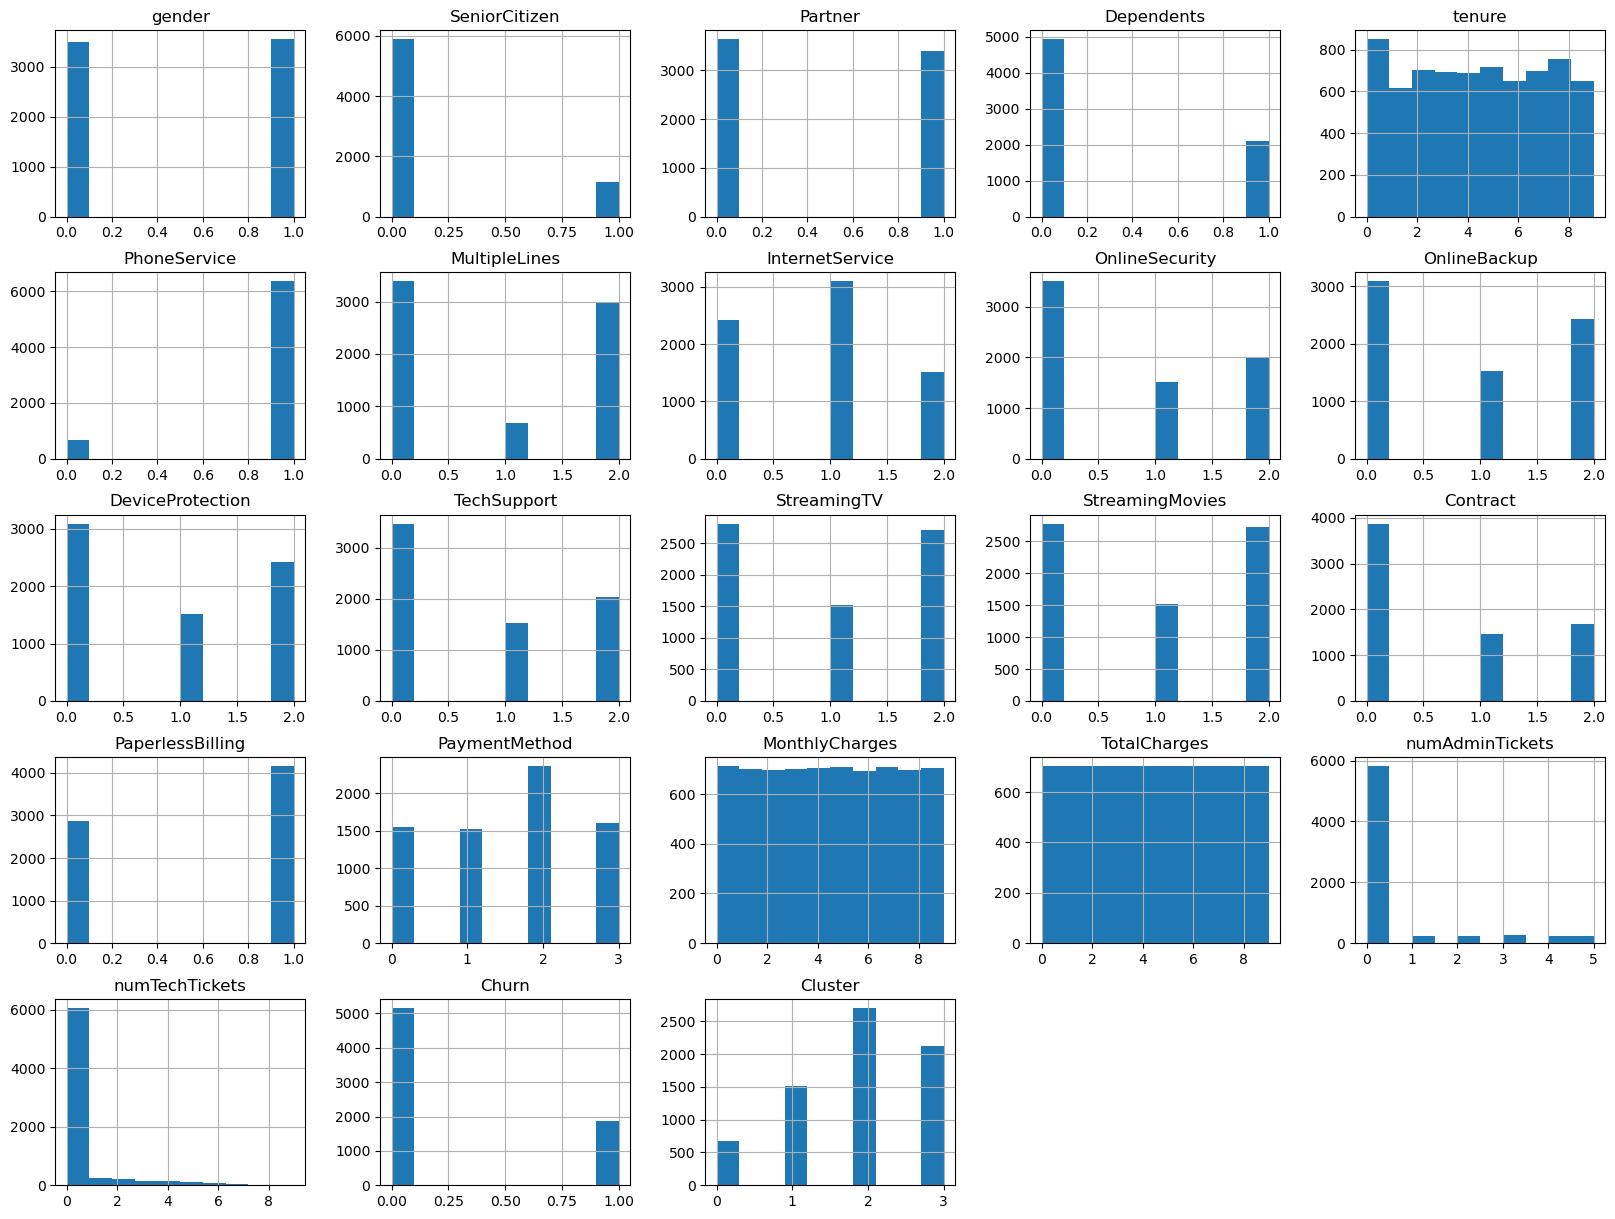

In [50]:
df1.hist()
plt.gcf().set_size_inches(20, 15)

making a copy of the data frame for the Machine Learning algoritms

In [51]:
df_ml = df1.copy()
df_ml.drop('Cluster', axis = 1, inplace = True)

In [52]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   gender            7032 non-null   int32
 1   SeniorCitizen     7032 non-null   int64
 2   Partner           7032 non-null   int32
 3   Dependents        7032 non-null   int32
 4   tenure            7032 non-null   int64
 5   PhoneService      7032 non-null   int32
 6   MultipleLines     7032 non-null   int32
 7   InternetService   7032 non-null   int32
 8   OnlineSecurity    7032 non-null   int32
 9   OnlineBackup      7032 non-null   int32
 10  DeviceProtection  7032 non-null   int32
 11  TechSupport       7032 non-null   int32
 12  StreamingTV       7032 non-null   int32
 13  StreamingMovies   7032 non-null   int32
 14  Contract          7032 non-null   int32
 15  PaperlessBilling  7032 non-null   int32
 16  PaymentMethod     7032 non-null   int32
 17  MonthlyCharges    7032 non-null  

## Machine Learning

In [53]:
x = df_ml.drop("Churn", axis = 1)
y = df_ml["Churn"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state = 42)

Testando um ensemble de modelos

In [54]:
mod1 = LogisticRegression(random_state = 42)

mod1.fit(x_train, y_train) 

LogisticRegression(random_state=42)

In [55]:
# Prediçoes para o treinamento e teste

y_pred_train_mod1 = mod1.predict(x_train)
y_pred_test_mod1 = mod1.predict(x_test)

In [56]:
# Acuràcias

print("Mod1 Treino:", round(metrics.accuracy_score(y_train, y_pred_train_mod1),2)*100)
print("Mod1 Teste:", round(metrics.accuracy_score(y_test, y_pred_test_mod1),2)*100)


Mod1 Treino: 86.0
Mod1 Teste: 86.0


In [57]:
modelos = [
                ("Emod1", LogisticRegression(random_state = 42))
                , ("Emod2", DecisionTreeClassifier(criterion = "gini", max_depth = 3, random_state = 42))
                , ("Emod3", DecisionTreeClassifier(criterion = "gini", max_depth = 8, random_state = 42))
            ]


e_multi = StackingClassifier(modelos, final_estimator = DecisionTreeClassifier(
                                       criterion = "gini"
                                     , max_depth = 3
                                     , min_samples_leaf = 15
                                     , min_samples_split = 20
                                     , max_leaf_nodes = 15
                                     , random_state = 42)
                                        , passthrough = True)
e_multi.fit(x_train, y_train)

y_pred_train_e_multi = e_multi.predict(x_train)
y_pred_test_e_multi = e_multi.predict(x_test)

In [58]:
print("Mod1 Treino:", round(metrics.accuracy_score(y_train, y_pred_train_mod1),2)*100)
print("Mod1 Teste:", round(metrics.accuracy_score(y_test, y_pred_test_mod1),2)*100)

print("e_multi Treino: {}".format(round(metrics.accuracy_score(y_train, y_pred_train_e_multi), 3)*100))
print("e_multi Teste:  {}".format(round(metrics.accuracy_score(y_test, y_pred_test_e_multi), 3)*100))

Mod1 Treino: 86.0
Mod1 Teste: 86.0
e_multi Treino: 86.4
e_multi Teste:  85.1


In [59]:
print(confusion_matrix(y_test, y_pred_test_mod1))
print()
print("--------------------------------------------------------------------------------")
print()
print(classification_report(y_test, y_pred_test_mod1))

[[2336  238]
 [ 271  671]]

--------------------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      2574
           1       0.74      0.71      0.73       942

    accuracy                           0.86      3516
   macro avg       0.82      0.81      0.81      3516
weighted avg       0.85      0.86      0.85      3516



In [60]:
print(confusion_matrix(y_test, y_pred_test_e_multi))
print()
print("--------------------------------------------------------------------------------")
print()
print(classification_report(y_test, y_pred_test_e_multi))

[[2293  281]
 [ 243  699]]

--------------------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      2574
           1       0.71      0.74      0.73       942

    accuracy                           0.85      3516
   macro avg       0.81      0.82      0.81      3516
weighted avg       0.85      0.85      0.85      3516



In [61]:
x1 = df_ml[important_features]
y1 = df_ml["Churn"]

In [62]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size = 0.5, random_state = 42)

In [63]:
mod1_1 = LogisticRegression(random_state = 42)

mod1_1.fit(x_train1, y_train1) 

LogisticRegression(random_state=42)

In [64]:
# Prediçoes para o treinamento e teste

y_pred_train_mod1_1 = mod1_1.predict(x_train1)
y_pred_test_mod1_1 = mod1_1.predict(x_test1)

In [65]:
modelos1 = [
                ("Emod1", LogisticRegression(random_state = 42))
                , ("Emod2", DecisionTreeClassifier(criterion = "gini", max_depth = 3, random_state = 42))
                , ("Emod3", DecisionTreeClassifier(criterion = "gini", max_depth = 8, random_state = 42))
            ]


e_multi_1 = StackingClassifier(modelos1, final_estimator = DecisionTreeClassifier(
                                       criterion = "gini"
                                     , max_depth = 3
                                     , min_samples_leaf = 15
                                     , min_samples_split = 20
                                     , max_leaf_nodes = 15
                                     , random_state = 42)
                                        , passthrough = True)
e_multi_1.fit(x_train1, y_train1)

y_pred_train_e_multi_1 = e_multi_1.predict(x_train1)
y_pred_test_e_multi_1 = e_multi_1.predict(x_test1)

In [66]:
print("Mod1 Treino:", round(metrics.accuracy_score(y_train, y_pred_train_mod1),2)*100)
print("Mod1 Teste:", round(metrics.accuracy_score(y_test, y_pred_test_mod1),2)*100)

print("e_multi Treino: {}".format(round(metrics.accuracy_score(y_train, y_pred_train_e_multi), 3)*100))
print("e_multi Teste:  {}".format(round(metrics.accuracy_score(y_test, y_pred_test_e_multi), 3)*100))

print('------------------------')

print("Mod1_1 Treino:", round(metrics.accuracy_score(y_train1, y_pred_train_mod1_1),2)*100)
print("Mod1_1 Teste:", round(metrics.accuracy_score(y_test1, y_pred_test_mod1_1),2)*100)

print("e_multi_1 Treino: {}".format(round(metrics.accuracy_score(y_train1, y_pred_train_e_multi_1), 2)*100))
print("e_multi_1 Teste:  {}".format(round(metrics.accuracy_score(y_test1, y_pred_test_e_multi_1), 2)*100))

Mod1 Treino: 86.0
Mod1 Teste: 86.0
e_multi Treino: 86.4
e_multi Teste:  85.1
------------------------
Mod1_1 Treino: 86.0
Mod1_1 Teste: 85.0
e_multi_1 Treino: 84.0
e_multi_1 Teste:  84.0


In [67]:
result = df2[df2['Churn'] == 'Yes'].groupby('tenure').count()
result_charges = df2[df2['Churn'] == 'Yes'].groupby('tenure').sum()

print('Clients that churn after 1 month: ',round(result['Churn'].cumsum().values[0] / result['Churn'].cumsum().values[-1] * 100, 2), '%')
print('Monthly Charges lost every 1 month: ',round(result_charges['MonthlyCharges'].cumsum().values[0] / result_charges['MonthlyCharges'].cumsum().values[-1] * 100, 2), '%')
print('Clients that churn after 3 months: ',round(result['Churn'].cumsum().values[4] / result['Churn'].cumsum().values[-1] * 100, 2), '%')
print('Monthly Charges lost every 3 months: R$',round(result_charges['MonthlyCharges'].cumsum().values[4] / result_charges['MonthlyCharges'].cumsum().values[-1] * 100, 2), '%')
print('Clients that churn after 12 months: ',round(result['Churn'].cumsum().values[11] / result['Churn'].cumsum().values[-1] * 100, 2), '%')
print('Monthly Charges lost every 12 months: R$',round(result_charges['MonthlyCharges'].cumsum().values[11] / result_charges['MonthlyCharges'].cumsum().values[-1] * 100, 2), '%')
print('Clients that churn after 34 months: ',round(result['Churn'].cumsum().values[33] / result['Churn'].cumsum().values[-1] * 100, 2), '%')
print('Monthly Charges lost every 34 months: R$',round(result_charges['MonthlyCharges'].cumsum().values[33] / result_charges['MonthlyCharges'].cumsum().values[-1] * 100, 2), '%')

Clients that churn after 1 month:  20.33 %
Monthly Charges lost every 1 month:  15.9 %
Clients that churn after 3 months:  39.81 %
Monthly Charges lost every 3 months: R$ 33.68 %
Clients that churn after 12 months:  55.48 %
Monthly Charges lost every 12 months: R$ 49.56 %
Clients that churn after 34 months:  79.51 %
Monthly Charges lost every 34 months: R$ 75.5 %


In [68]:
print(result_charges['MonthlyCharges'].cumsum().values[11])
print(df2[(df2['Churn'] == 'Yes') & ((df_ml['tenure'] == 0) | (df_ml['tenure'] == 1) | (df_ml['tenure'] == 2))].sum()[17])

68954.25
68954.25


In [69]:
df_ml['target'] = np.where(
    (df2['Churn'] == 'Yes') & ((df_ml['tenure'] == 0) | (df_ml['tenure'] == 1) | (df_ml['tenure'] == 2)),
    1,
    0
)


In [70]:
df_ml

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn,target
0,0,0,1,0,0,0,1,0,0,2,...,0,0,1,2,2,0,0,0,0,0
1,1,0,0,0,5,1,0,0,2,0,...,0,1,0,3,3,5,0,0,0,0
2,1,0,0,0,0,1,0,0,2,2,...,0,0,1,3,3,1,0,0,1,1
3,1,0,0,0,6,0,1,0,2,0,...,0,1,0,0,2,5,0,3,0,0
4,0,0,0,0,0,1,0,1,0,0,...,0,0,1,2,5,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,4,1,2,0,2,0,...,2,1,1,3,6,5,0,0,0,0
7039,0,0,1,1,9,1,2,1,0,2,...,2,1,1,1,9,9,0,5,0,0
7040,0,0,1,1,2,0,1,0,2,0,...,0,0,1,2,2,2,0,0,0,0
7041,1,1,1,0,1,1,2,1,0,0,...,0,0,1,3,5,2,0,0,1,1


In [71]:
x_t = df_ml.drop(["tenure", "target", "Churn"], axis=1)
y_t = df_ml["target"]

x_train_t, x_test_t, y_train_t, y_test_t = train_test_split(x_t, y_t, test_size=0.5, random_state=42)


In [72]:
mod1_t = LogisticRegression(random_state = 42)

mod1_t.fit(x_train_t, y_train_t) 

LogisticRegression(random_state=42)

In [73]:
# Prediçoes para o treinamento e teste

y_pred_train_mod1_t = mod1_t.predict(x_train_t)
y_pred_test_mod1_t = mod1_t.predict(x_test_t)

In [74]:
# Acuràcias

print("Mod1_t Treino:", round(metrics.accuracy_score(y_train_t, y_pred_train_mod1_t),2)*100)
print("Mod1_t Teste:", round(metrics.accuracy_score(y_test_t, y_pred_test_mod1_t),2)*100)

Mod1_t Treino: 90.0
Mod1_t Teste: 90.0


In [75]:
modelos_t = [
                ("Emod1", LogisticRegression(random_state = 42))
                , ("Emod2", DecisionTreeClassifier(criterion = "gini", max_depth = 3, random_state = 42))
                , ("Emod3", DecisionTreeClassifier(criterion = "gini", max_depth = 8, random_state = 42))
            ]


e_multi_t = StackingClassifier(modelos_t, final_estimator = DecisionTreeClassifier(
                                       criterion = "gini"
                                     , max_depth = 3
                                     , min_samples_leaf = 15
                                     , min_samples_split = 20
                                     , max_leaf_nodes = 15
                                     , random_state = 42)
                                        , passthrough = True)
e_multi_t.fit(x_train_t, y_train_t)

y_pred_train_e_multi_t = e_multi_t.predict(x_train_t)
y_pred_test_e_multi_t = e_multi_t.predict(x_test_t)

In [76]:
print("Mod1_t Treino:", round(metrics.accuracy_score(y_train_t, y_pred_train_mod1_t),2)*100)
print("Mod1_t Teste:", round(metrics.accuracy_score(y_test_t, y_pred_test_mod1_t),2)*100)

print("e_multi_t Treino: {}".format(round(metrics.accuracy_score(y_train_t, y_pred_train_e_multi_t), 3)*100))
print("e_multi_t Teste:  {}".format(round(metrics.accuracy_score(y_test_t, y_pred_test_e_multi_t), 2)*100))

Mod1_t Treino: 90.0
Mod1_t Teste: 90.0
e_multi_t Treino: 90.4
e_multi_t Teste:  91.0


In [77]:
print(confusion_matrix(y_test_t, y_pred_test_mod1_t))
print()
print("--------------------------------------------------------------------------------")
print()
print(classification_report(y_test_t, y_pred_test_mod1_t))

[[2848  161]
 [ 196  311]]

--------------------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      3009
           1       0.66      0.61      0.64       507

    accuracy                           0.90      3516
   macro avg       0.80      0.78      0.79      3516
weighted avg       0.90      0.90      0.90      3516



In [78]:
print(confusion_matrix(y_test_t, y_pred_test_e_multi_t))
print()
print("--------------------------------------------------------------------------------")
print()
print(classification_report(y_test_t, y_pred_test_e_multi_t))

[[2904  105]
 [ 224  283]]

--------------------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      3009
           1       0.73      0.56      0.63       507

    accuracy                           0.91      3516
   macro avg       0.83      0.76      0.79      3516
weighted avg       0.90      0.91      0.90      3516



In [79]:
important_features_t = important_features
important_features_t.remove('tenure')

In [80]:
x1_t = df_ml[important_features_t]
y1_t = df_ml["target"]

In [81]:
x_train1_t, x_test1_t, y_train1_t, y_test1_t = train_test_split(x1_t, y1_t, test_size = 0.5, random_state = 42)

In [82]:
mod1_1_t = LogisticRegression(random_state = 42)

mod1_1_t.fit(x_train1_t, y_train1_t) 

LogisticRegression(random_state=42)

In [83]:
# Prediçoes para o treinamento e teste

y_pred_train_mod1_1_t = mod1_1_t.predict(x_train1_t)
y_pred_test_mod1_1_t = mod1_1_t.predict(x_test1_t)

In [84]:
modelos1_t = [
                ("Emod1", LogisticRegression(random_state = 42))
                , ("Emod2", DecisionTreeClassifier(criterion = "gini", max_depth = 3, random_state = 42))
                , ("Emod3", DecisionTreeClassifier(criterion = "gini", max_depth = 8, random_state = 42))
            ]


e_multi_1_t = StackingClassifier(modelos1_t, final_estimator = DecisionTreeClassifier(
                                       criterion = "gini"
                                     , max_depth = 3
                                     , min_samples_leaf = 15
                                     , min_samples_split = 20
                                     , max_leaf_nodes = 15
                                     , random_state = 42)
                                        , passthrough = True)
e_multi_1_t.fit(x_train1_t, y_train1_t)

y_pred_train_e_multi_1_t = e_multi_1_t.predict(x_train1_t)
y_pred_test_e_multi_1_t = e_multi_1_t.predict(x_test1_t)

In [85]:
print("Mod1 Treino:", round(metrics.accuracy_score(y_train_t, y_pred_train_mod1_t),2)*100)
print("Mod1 Teste:", round(metrics.accuracy_score(y_test_t, y_pred_test_mod1_t),2)*100)

print("e_multi Treino: {}".format(round(metrics.accuracy_score(y_train_t, y_pred_train_e_multi_t), 3)*100))
print("e_multi Teste:  {}".format(round(metrics.accuracy_score(y_test_t, y_pred_test_e_multi_t), 2)*100))

print('------------------------')

print("Mod1_1 Treino:", round(metrics.accuracy_score(y_train1_t, y_pred_train_mod1_1_t),2)*100)
print("Mod1_1 Teste:", round(metrics.accuracy_score(y_test1_t, y_pred_test_mod1_1_t),2)*100)

print("e_multi_1 Treino: {}".format(round(metrics.accuracy_score(y_train1_t, y_pred_train_e_multi_1_t), 2)*100))
print("e_multi_1 Teste:  {}".format(round(metrics.accuracy_score(y_test1_t, y_pred_test_e_multi_1_t), 3)*100))

Mod1 Treino: 90.0
Mod1 Teste: 90.0
e_multi Treino: 90.4
e_multi Teste:  91.0
------------------------
Mod1_1 Treino: 91.0
Mod1_1 Teste: 90.0
e_multi_1 Treino: 91.0
e_multi_1 Teste:  90.9


# Conclusion

Answering the initial Questions

------------------------------------------------------------
- What is the current Churn Rate?
The current churn rate is 26.58%

     Clients that churn after 1 month:  20.33 %
     Monthly Charges lost after 1 month:  15.9 %
     Clients that churn after 3 months:  39.81 %
     Monthly Charges lost after 3 months: R$ 33.68 %
     Clients that churn after 12 months:  55.48 %
     Monthly Charges lost after 12 months: R$ 49.56 %
     Clients that churn after 34 months:  79.51 %
     Monthly Charges lost after 34 months: R$ 75.5 %
------------------------------------------------------------
- What new clients are more probable to Churn?
The most important features to predict if a new client will churn are:
['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'numTechTickets']

To 

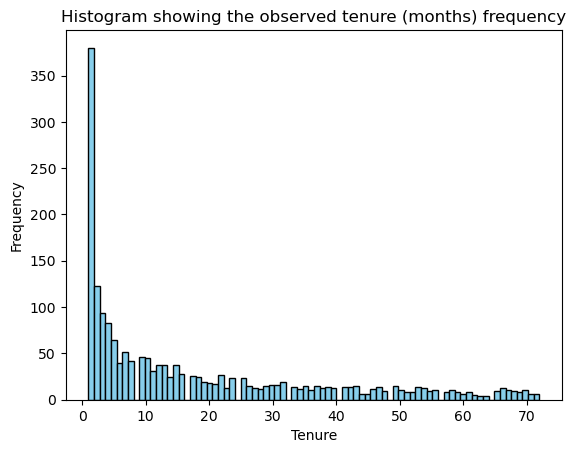

To predict the period in months estimated for that new Churn a Logistic regression machine learning model was created with the accuracy below:
Mod1_1 Treino: 91.0
Mod1_1 Teste: 90.0
------------------------------------------------------------


In [104]:
print('------------------------------------------------------------')
print('- What is the current Churn Rate?')
print(f'The current churn rate is {churn_prop}%')
print('')
print('     Clients that churn after 1 month: ',round(result['Churn'].cumsum().values[0] / result['Churn'].cumsum().values[-1] * 100, 2), '%')
print('     Monthly Charges lost after 1 month: ',round(result_charges['MonthlyCharges'].cumsum().values[0] / result_charges['MonthlyCharges'].cumsum().values[-1] * 100, 2), '%')
print('     Clients that churn after 3 months: ',round(result['Churn'].cumsum().values[4] / result['Churn'].cumsum().values[-1] * 100, 2), '%')
print('     Monthly Charges lost after 3 months: R$',round(result_charges['MonthlyCharges'].cumsum().values[4] / result_charges['MonthlyCharges'].cumsum().values[-1] * 100, 2), '%')
print('     Clients that churn after 12 months: ',round(result['Churn'].cumsum().values[11] / result['Churn'].cumsum().values[-1] * 100, 2), '%')
print('     Monthly Charges lost after 12 months: R$',round(result_charges['MonthlyCharges'].cumsum().values[11] / result_charges['MonthlyCharges'].cumsum().values[-1] * 100, 2), '%')
print('     Clients that churn after 34 months: ',round(result['Churn'].cumsum().values[33] / result['Churn'].cumsum().values[-1] * 100, 2), '%')
print('     Monthly Charges lost after 34 months: R$',round(result_charges['MonthlyCharges'].cumsum().values[33] / result_charges['MonthlyCharges'].cumsum().values[-1] * 100, 2), '%')

print('------------------------------------------------------------')
print('- What new clients are more probable to Churn?')
print('The most important features to predict if a new client will churn are:')
print(important_features)
print('')
print('To predict if a new client will Churn, a Logistic regression machine learning model was created with the accuracy below:')
print("Accuracy at Train:", round(metrics.accuracy_score(y_train1, y_pred_train_mod1_1),2)*100)
print("Accuracy at Teste:", round(metrics.accuracy_score(y_test1, y_pred_test_mod1_1),2)*100)
print('------------------------------------------------------------')
print('- What is the period in months estimated for that new Churn?')
df_churn_yes = df[df['Churn'] == 'Yes']

plt.hist(df_churn_yes['tenure'], bins=80, color='skyblue', edgecolor='black')

plt.xlabel('Tenure')
plt.ylabel('Frequency')

plt.title('Histogram showing the observed tenure (months) frequency')

plt.show()
print('To predict the period in months estimated for that new Churn a Logistic regression machine learning model was created with the accuracy below:')
print("Mod1_1 Treino:", round(metrics.accuracy_score(y_train1_t, y_pred_train_mod1_1_t),2)*100)
print("Mod1_1 Teste:", round(metrics.accuracy_score(y_test1_t, y_pred_test_mod1_1_t),2)*100)
print('------------------------------------------------------------')